In [477]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns


In [478]:
df = pd.read_csv('Sample-Superstore.csv', encoding='ISO-8859-1')

In [479]:
df.shape

(9994, 21)

In [480]:
df.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

In [481]:
df.describe()

,Row ID,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,55190.379428,229.858001,3.789574,0.156203,28.656896
std,2885.163629,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1.000000,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,90008.000000,209.940000,5.000000,0.200000,29.364000
max,9994.000000,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [482]:
df.isnull().sum()

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

In [483]:
df.head(5)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [484]:
df.dtypes

Row ID             int64
Order ID          object
Order Date        object
Ship Date         object
Ship Mode         object
Customer ID       object
Customer Name     object
Segment           object
Country           object
City              object
State             object
Postal Code        int64
Region            object
Product ID        object
Category          object
Sub-Category      object
Product Name      object
Sales            float64
Quantity           int64
Discount         float64
Profit           float64
dtype: object

In [485]:
df["Order Date"] = pd.to_datetime(df["Order Date"])
df["Ship Date"] = pd.to_datetime(df["Ship Date"])

In [486]:
df['Postal Code'].nunique()

631

In [487]:
sns.set_theme()
sns.set_style('darkgrid')
sns.set(rc={
    'axes.labelsize': 15,
    'axes.titlesize': 15,
    'axes.titlepad': 10,
    'xtick.labelsize': 10,
    'xtick.color': 'grey',
    'ytick.labelsize': 10,
    'ytick.color': 'grey',
    'axes.titlecolor': 'black',
    "figure.dpi":100, 
    'savefig.dpi':200,
    }) 

In [488]:
color = ['#ff9e03', 'g', 'b', 'r', '#ffb300']

In [489]:
df['weekday'] = df['Order Date'].dt.strftime('%A')
df['year'] = df['Order Date'].dt.year
df['quarter'] = df['Order Date'].dt.quarter
weekdays = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
df['weekday'] = pd.Categorical(df['weekday'], categories=weekdays, ordered=True)

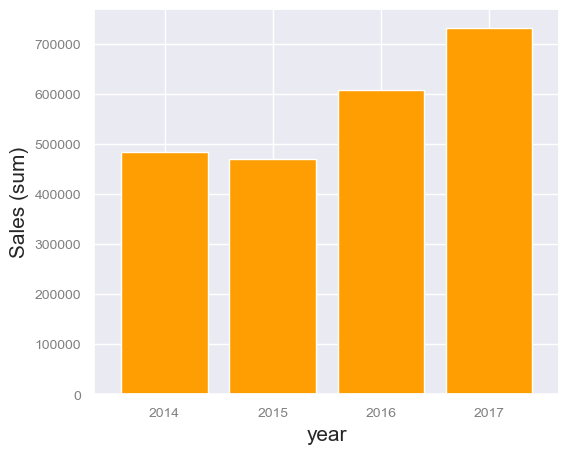

In [490]:
fig, ax = plt.subplots(figsize=(6, 5))

days = df.groupby(df['year'])
days['Sales'].sum().plot(kind='bar', width=0.8, color=color[0], x=weekdays)
ax.set_ylabel('Sales (sum)')
plt.xticks(rotation=0)
plt.show()

[2014, 2015, 2016, 2017]


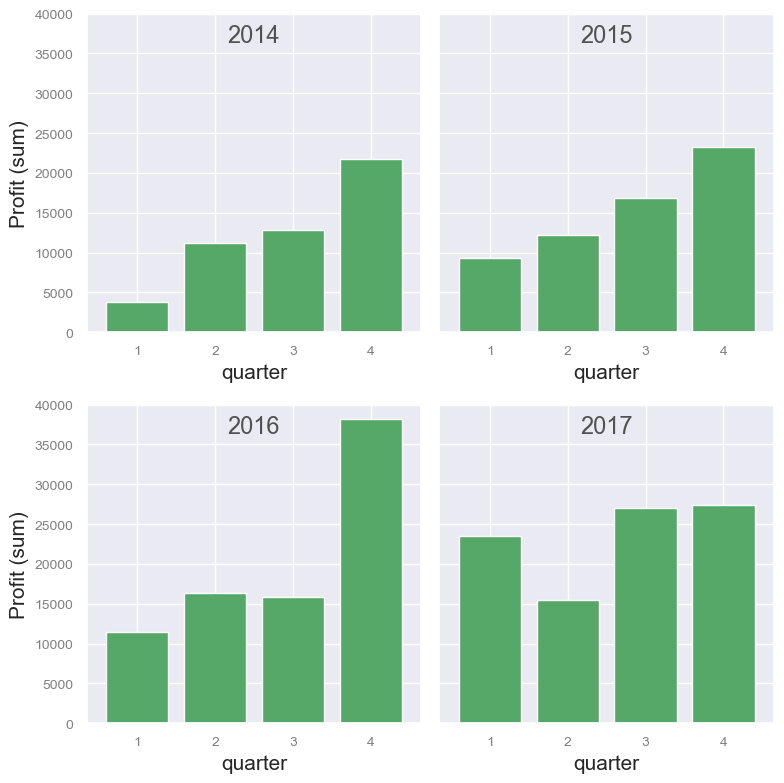

In [491]:
def q_profit_plot(year, ax):
    quarters = df[df['year'] == year].groupby(df['quarter'])
    quarters['Profit'].sum().plot(kind='bar', width=0.8, color=color[1], ax=ax)
    ax.set_ylabel('Profit (sum)')
    ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
    ax.text(0.42, 0.91, year, transform=ax.transAxes, fontsize=17, color='#525252')

years = sorted(np.array(df['year'].unique()))
print(years)
fig, ax = plt.subplots(2, 2, figsize=(8, 8), sharey=True)

for i in range(2):
    k = i * 2
    for j in range(2):
        q_profit_plot(years[k+j], ax[i][j])

plt.tight_layout()
plt.show()

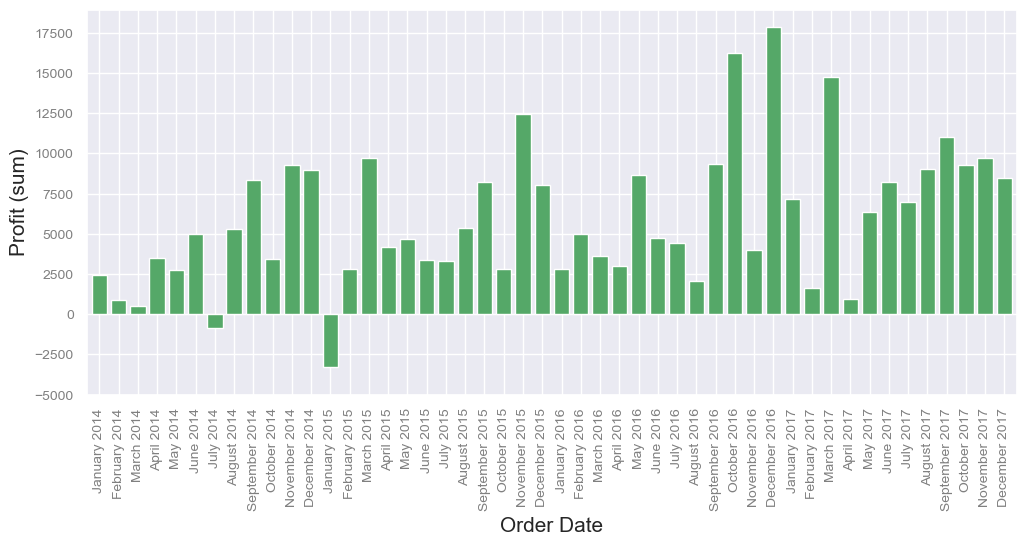

In [492]:
fig, ax = plt.subplots(figsize=(12, 5))

months = df.groupby(pd.Grouper(key="Order Date", freq='M'))
months['Profit'].sum().plot(kind='bar', width=0.8, color=color[1])
xlabels = [m.strftime('%B %Y') for m, g in months]
ax.set_xticks(ax.get_xticks())
ax.set_xticklabels(xlabels)
ax.set_yticks(np.arange(-5000, 20000, 2500))
ax.set_ylabel('Profit (sum)')
plt.show()

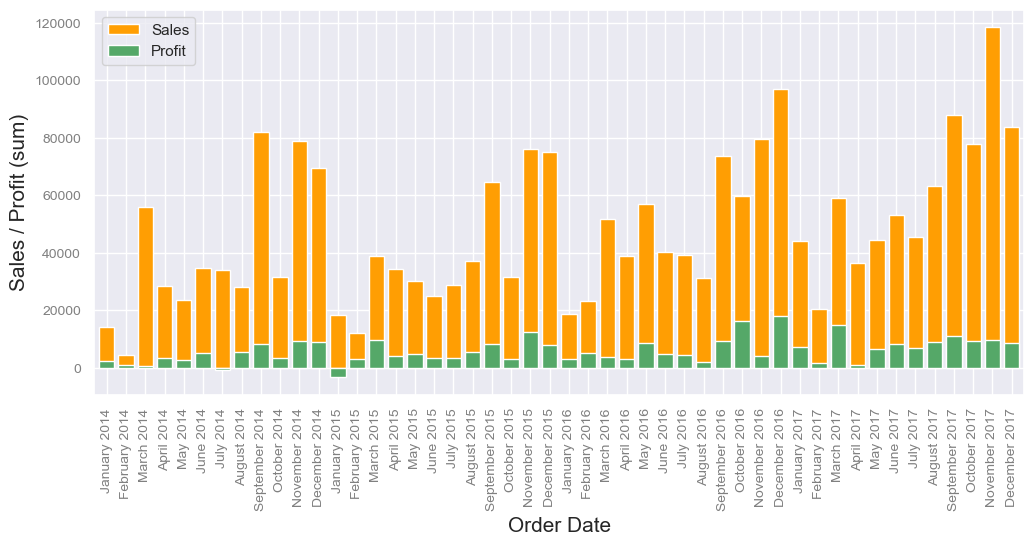

In [493]:
fig, ax = plt.subplots(figsize=(12, 5))

months = df.groupby(pd.Grouper(key="Order Date", freq='M'))
months['Sales'].sum().plot(kind='bar', width=0.8, color=color[0])
months['Profit'].sum().plot(kind='bar', width=0.8, color=color[1])
xlabels = [m.strftime('%B %Y') for m, g in months]
ax.set_xticks(ax.get_xticks())
ax.set_xticklabels(xlabels)
ax.set_ylabel('Sales / Profit (sum)')
plt.legend()
plt.show()

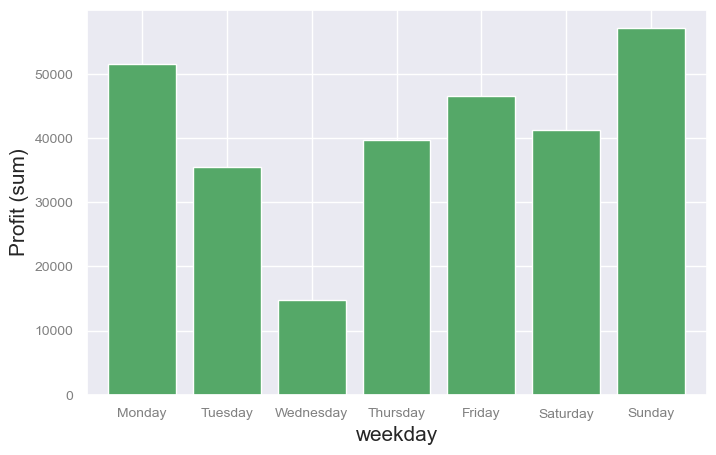

In [494]:
fig, ax = plt.subplots(figsize=(8, 5))

days = df.groupby(df['weekday'])
days['Profit'].sum().plot(kind='bar', width=0.8, color=color[1], x=weekdays)
ax.set_ylabel('Profit (sum)')
plt.xticks(rotation=0)
plt.show()

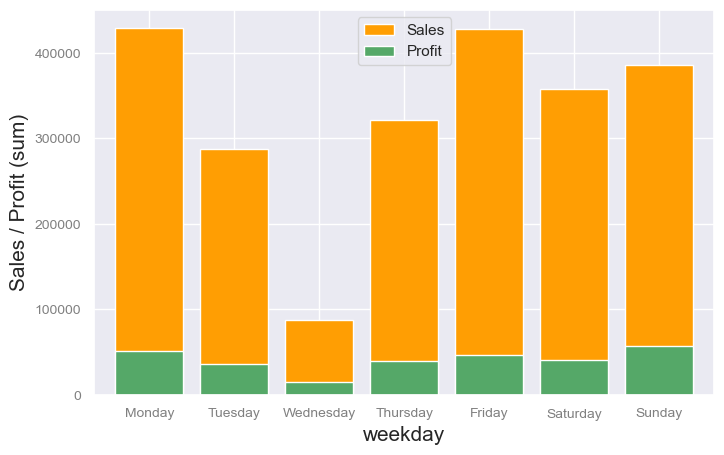

In [495]:
fig, ax = plt.subplots(figsize=(8, 5))

days = df.groupby(df['weekday'])
days['Sales'].sum().plot(kind='bar', width=0.8, color=color[0], x=weekdays)
days['Profit'].sum().plot(kind='bar', width=0.8, color=color[1], x=weekdays)
ax.set_ylabel('Sales / Profit (sum)')
plt.xticks(rotation=0)
plt.legend(loc='upper center')
plt.show()

In [496]:
df['Cost'] = round((df['Sales'] - df['Profit'])/df['Quantity'], 4)
df['Sell Price'] = round(df['Sales']/((1 - df['Discount'])*df['Quantity']), 4)
df['Net Profit Margin'] = df['Profit']/df['Sales']
df['ROI'] = df['Profit']/(df['Cost']*df['Quantity'])

In [497]:
df['ROI']

0       0.190476
1       0.428571
2       0.886792
3      -0.285714
4       0.126761
          ...   
9989    0.194030
9990    0.204819
9991    0.081081
9992    0.818182
9993    0.428571
Name: ROI, Length: 9994, dtype: float64

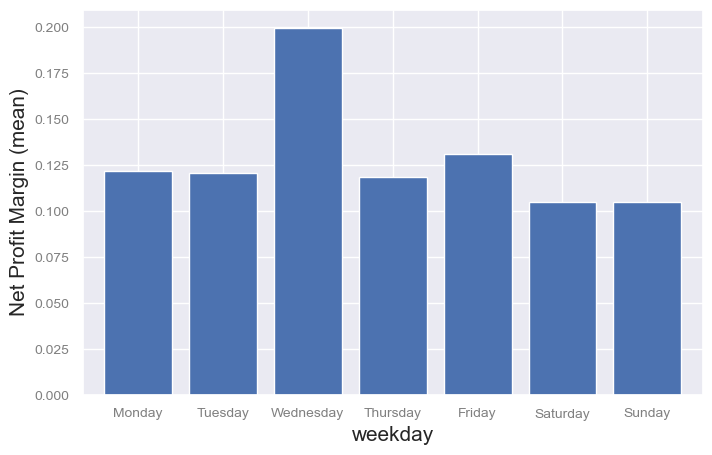

In [498]:
fig, ax = plt.subplots(figsize=(8, 5))

days = df.groupby(df['weekday'])
days['Net Profit Margin'].mean().plot(kind='bar', width=0.8, color=color[2], x=weekdays)
ax.set_ylabel('Net Profit Margin (mean)')
plt.xticks(rotation=0)
plt.show()

In [499]:
def get_top(data, n):
    return data.sort_values(ascending=False).head(n)

def get_bottom(data, n):
    return data.sort_values().head(n)

In [500]:
categories_order = df['Category'].unique()
subcategories_order = []

for cat in categories_order:
    sc = df[df['Category'] == cat ]['Sub-Category'].unique()
    subcategories_order.extend(sc)

df['Category'] = pd.Categorical(df['Category'], categories=categories_order)
df['Sub-Category'] = pd.Categorical(df['Sub-Category'], categories=subcategories_order)


In [501]:
subcat_roi = pd.DataFrame()

for key, item in df.groupby('Sub-Category'):
    l = len(subcat_roi)
    subcat_roi.loc[l, "Sub-Category"] = key
    subcat_roi.loc[l, "Category"] = item['Category'].values[0]
    subcat_roi.loc[l, "ROI"] = item['Profit'].sum()/(item['Cost']*item['Quantity']).sum()


In [502]:
def subcategories_plot(data, feature, estimator = 'mean', errorbar=('ci', 95)):

    fig, ax = plt.subplots(figsize=(10, 5))

    sns.barplot(
        data=data,
        x="Sub-Category",
        y=feature,
        estimator=estimator,
        errorbar=errorbar,
        hue="Category",
        width=0.96,
        dodge=0,
    )

    plt.ylabel(f'{feature} ({estimator})')
    plt.xticks(rotation=90)
    plt.show()

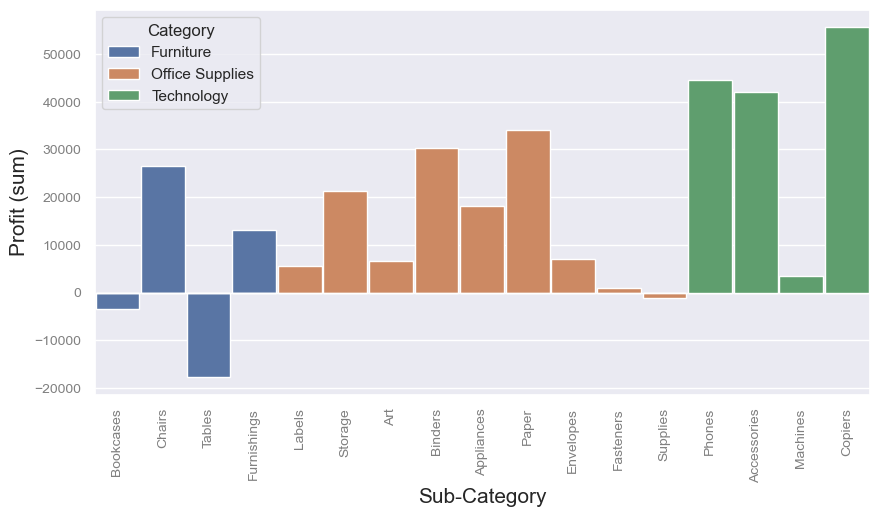

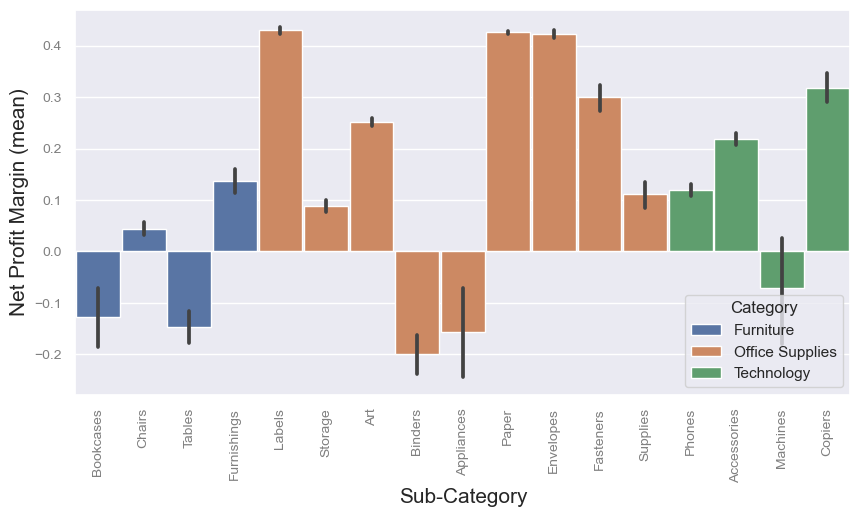

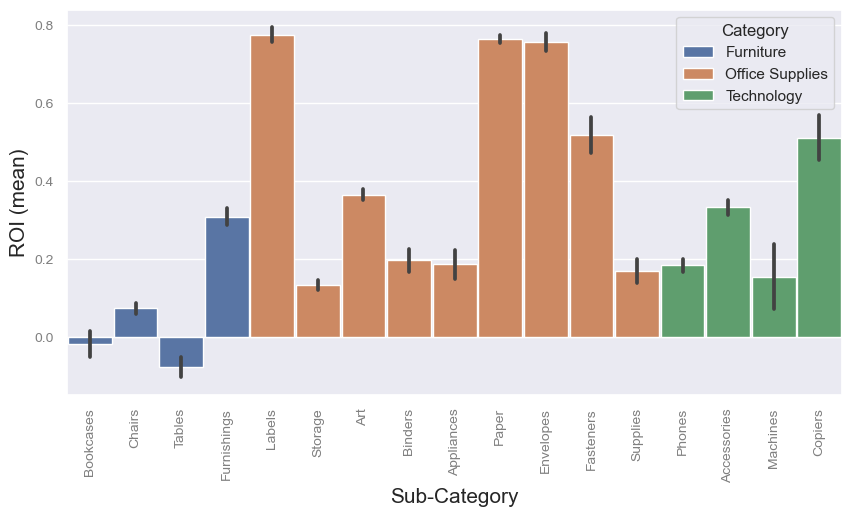

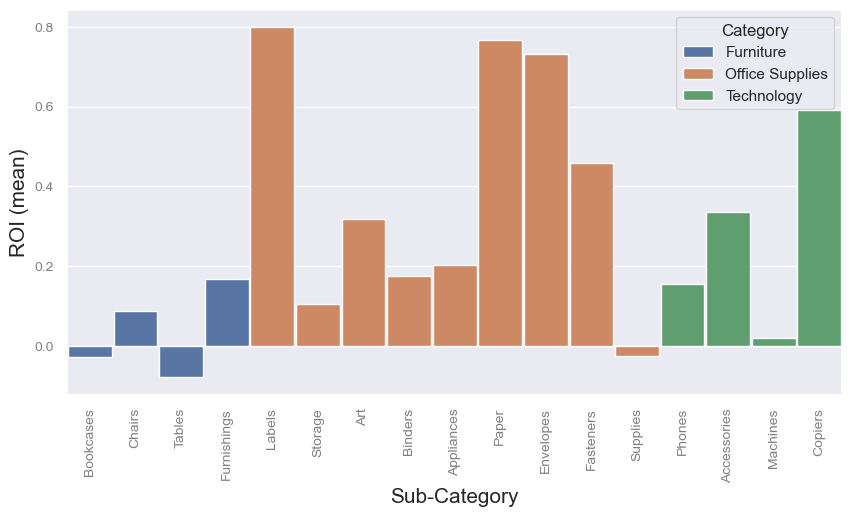

In [503]:
subcategories_plot(df, 'Profit', 'sum', None)
subcategories_plot(df, 'Net Profit Margin', "mean")
subcategories_plot(df, 'ROI', 'mean')
subcategories_plot(subcat_roi, 'ROI', 'mean', None)

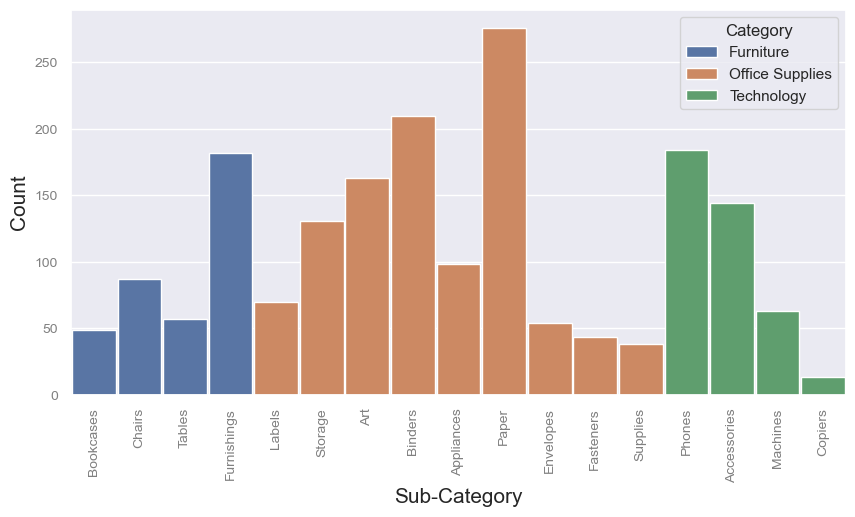

In [504]:
fig, ax = plt.subplots(figsize=(10, 5))

sns.countplot(
    data=df.drop_duplicates(subset='Product ID'),
    x="Sub-Category",
    hue="Category",
    width=0.96,
    dodge=0,
    order=subcategories_order,
)


ax.set_ylabel('Count')

plt.xticks(rotation=90)
plt.show()

<Axes: >

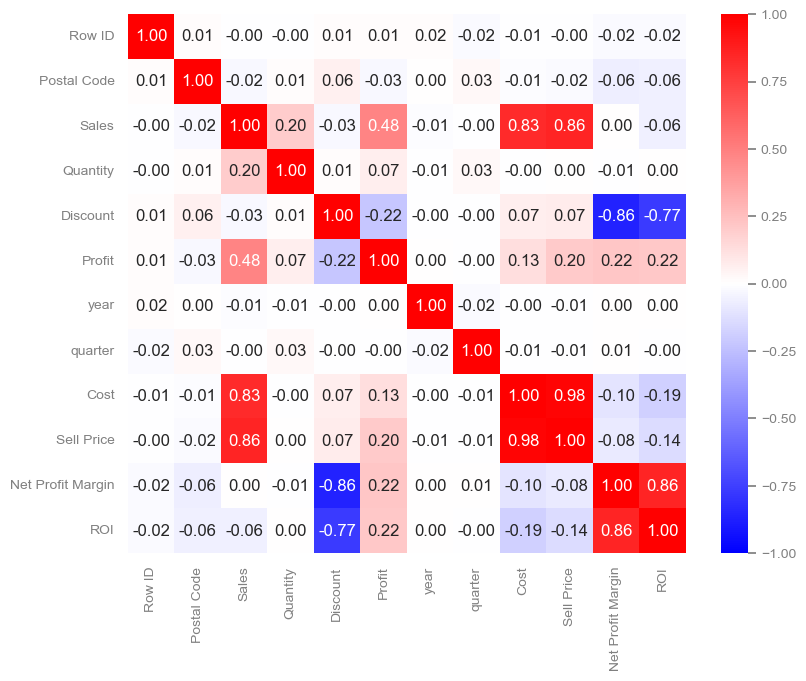

In [505]:
fig, ax = plt.subplots(figsize=(9, 7))

sns.heatmap(
        df.corr(numeric_only=True),
        annot=True,
        fmt=".2f",
        cmap="bwr",
        # mask=mask,
        vmin=-1,
        vmax=1,
)

In [506]:
state_orders = df.groupby('State')['Order ID'].count()
state_sales = df.groupby('State')['Sales'].sum()
state_discount = df.groupby('State')['Discount'].mean()

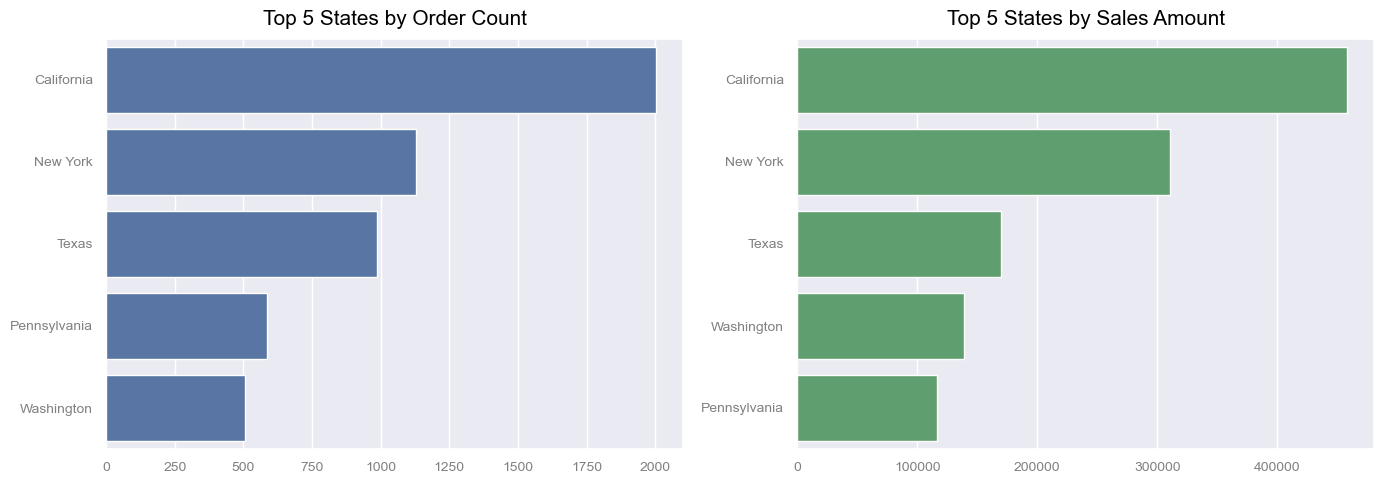

In [507]:
fig, ax = plt.subplots(1, 2, figsize=(14, 5))
sns.barplot(y=get_top(state_orders, 5).index.tolist(), x=get_top(state_orders, 5).values, color=color[2], ax=ax[0])
sns.barplot(y=get_top(state_sales, 5).index.tolist(), x=get_top(state_sales, 5).values, color=color[1], ax=ax[1])
ax[0].set_title('Top 5 States by Order Count')
ax[1].set_title('Top 5 States by Sales Amount')
plt.tight_layout()

In [508]:
customer_orders = df.groupby('Customer ID')['Order ID'].count()
customer_sales = df.groupby('Customer ID')['Sales'].sum()

In [509]:
def get_names(ids):
    names = []
    for id in ids:
        names.append(df[df['Customer ID'] == id]['Customer Name'].unique()[0])
    return(names)

Text(0.5, 1.0, 'Top 5 Customers by Sales Amount')

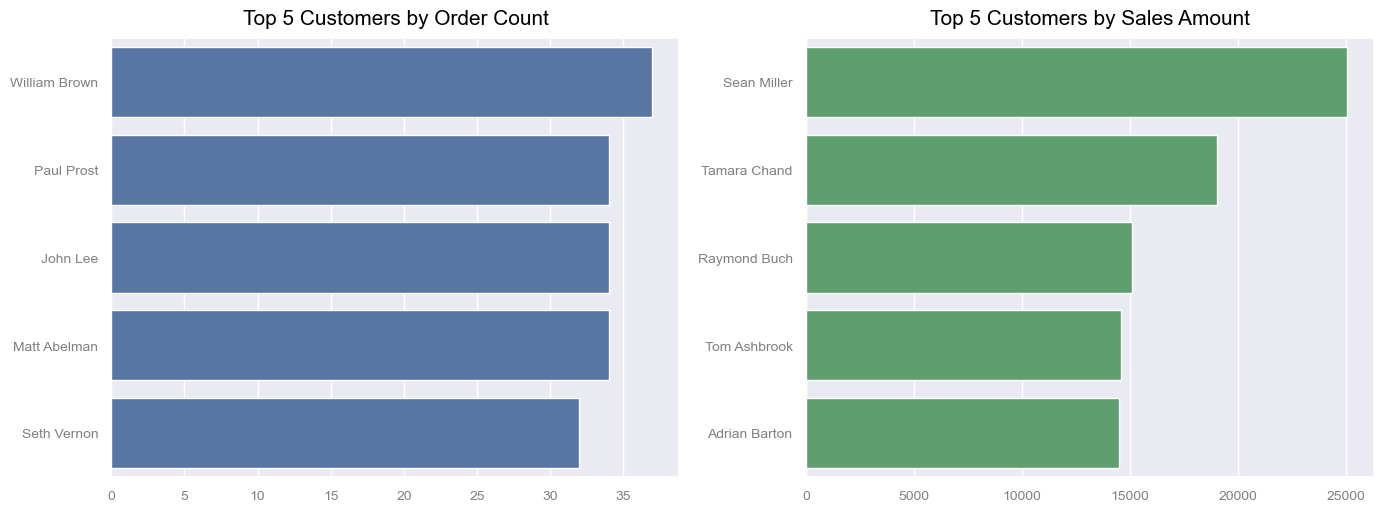

In [510]:
fig, ax = plt.subplots(1, 2, figsize=(14, 5))
sns.barplot(y=get_names(get_top(customer_orders, 5).index), x=get_top(customer_orders, 5).values, color=color[2], ax=ax[0])
sns.barplot(y=get_names(get_top(customer_sales, 5).index), x=get_top(customer_sales, 5).values, color=color[1], ax=ax[1])
plt.tight_layout()
ax[0].set_title('Top 5 Customers by Order Count')
ax[1].set_title('Top 5 Customers by Sales Amount')

Text(0.5, 1.0, 'Top 5 States by Discounts (mean)')

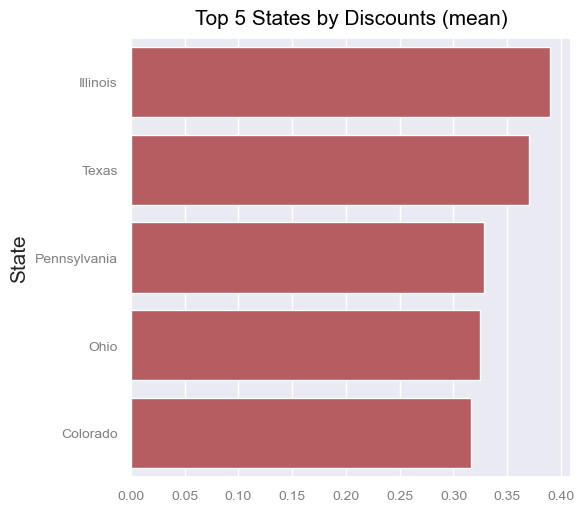

In [511]:
state_discount = df.groupby('State')['Discount'].mean().sort_values(ascending=False).head(5)

fig, ax = plt.subplots(1, figsize=(6, 5))
sns.barplot(y=get_top(state_discount, 5).index, x=get_top(state_discount, 5).values, color=color[3])
plt.tight_layout()
ax.set_title('Top 5 States by Discounts (mean)')


In [512]:
import folium
from folium import plugins
from branca.element import Figure
from branca.colormap import linear
from branca.colormap import LinearColormap
import json

In [513]:
with open('us-states.json', "r") as json_file:
    us_states = json.load(json_file)

with open('us-states-coordinates.json', "r") as json_file:
    us_state_coordinates = json.load(json_file)

def get_state_coordinates(state, coordinates_json):
    # Default to [0, 0] if no coordinates found
    return coordinates_json.get(state, [0, 0])


In [534]:
fig = Figure(width=800, height=600)

state_values = state_sales
top5 = get_top(state_values, 5)
bottom5 = get_bottom(state_values, 5)
max_value = top5.max()
min_value = bottom5.min()
my_colormap = LinearColormap(
    colors=["#ffe6b3","#a5f765", "#00ba70"], index=[0, 50, 100], vmin=0, vmax=100
)
colormap = my_colormap.scale(min_value, max_value)
color_dict = {key: colormap(state_values[key]) for key in state_values.keys()}

m = folium.Map([40, -100], zoom_start=4)

colormap.caption = "Sales Sum"
colormap.add_to(m)

for feature in us_states["features"]:
    state = feature["properties"]["name"]
    coordinates = get_state_coordinates(state, us_state_coordinates)
    geojson_state = folium.GeoJson(
        feature,
        style_function=lambda feature: {
            "fillColor": color_dict.get(feature["properties"]["name"], "grey"),
            "color": "#cc9f91",
            "weight": 1,
            "fillOpacity": 1,
        },
        tooltip=state,
    ).add_to(m)

html = [
    '<div style="font-size: 15px; font-weight: bold;',
    'width:100px; text-decoration: initial; text-shadow: -1px -1px 0 #000, \
    1px -1px 0 #000, -1px 1px 0 #000, 1px 1px 0 #000; ">',
    '</div>'
]

def name_marker(data, map, html, color):
    txt_color = f"color: {color};"
    for state in data.index:
        coordinates = get_state_coordinates(state, us_state_coordinates)
        label = folium.Marker(
            location=coordinates,  # Use the coordinates from the GeoJSON
            icon=folium.DivIcon(
                html=html[0] + txt_color + html[1] + state + html[2]
            ),
        )
        label.add_to(map)

name_marker(top5, m, html, '#78ffac')
name_marker(bottom5, m, html, '#f7ff96')

fig.add_child(m)

In [515]:
df.groupby('Customer ID')['Order ID'].count()
# df = df.merge(df.groupby('Customer ID')['Order ID'].count(), on='Customer ID')
# df.rename(columns={'Order ID_x': 'Order_ID', 'Order ID_y': 'Order Count'}, inplace=True)

Customer ID
AA-10315    11
AA-10375    15
AA-10480    12
AA-10645    18
AB-10015     6
            ..
XP-21865    28
YC-21895     8
YS-21880    12
ZC-21910    31
ZD-21925     9
Name: Order ID, Length: 793, dtype: int64

In [516]:
df['Delivery Time'] = df['Ship Date'] - df['Order Date']

In [517]:
customer_first_order = pd.DataFrame()
for group in df.groupby('Customer ID')['Order Date']:
    l = len(customer_first_order)
    customer_first_order.loc[l, 'Customer ID'] = group[0]
    customer_first_order.loc[l, 'Order Date'] = group[1].values[-1]


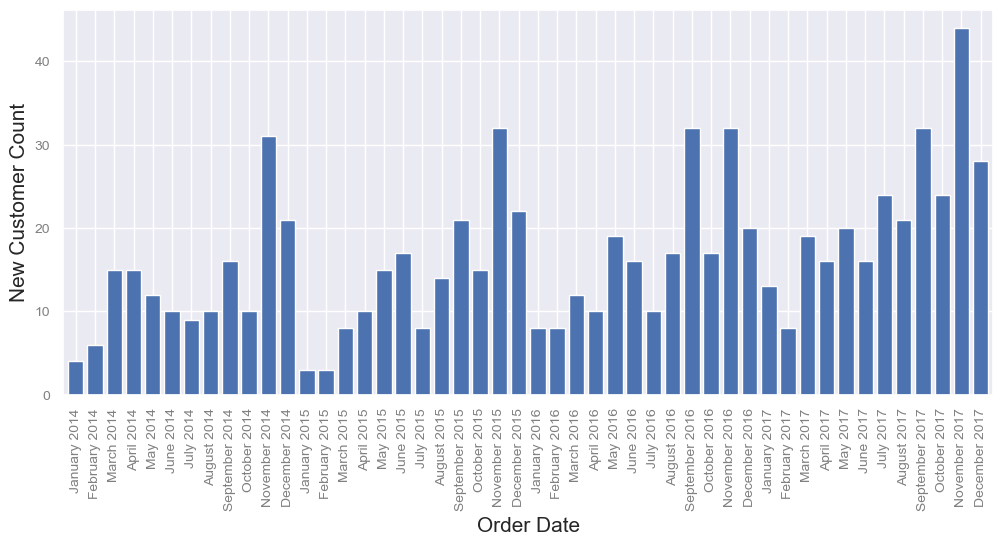

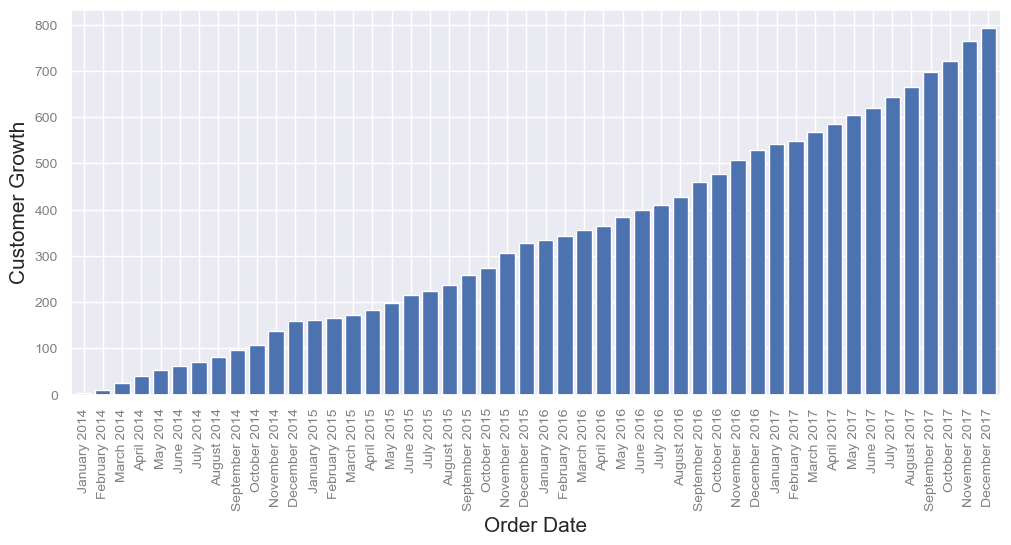

In [518]:
def customer_growth_plot(type, dates):
    
    fig, ax = plt.subplots(figsize=(12, 5))

    months = dates.groupby(pd.Grouper(key="Order Date", freq='M'))
    monthly_customer_count = months['Customer ID'].count()
    if type == "new":
         count = monthly_customer_count
         ax.set_ylabel("New Customer Count")
    else: 
        count = monthly_customer_count.cumsum()
        ax.set_ylabel("Customer Growth")
    count.plot(
        kind='bar',
        width=0.8, 
        color=color[2]
    )
    xlabels = [m.strftime('%B %Y') for m, g in months]
    ax.set_xticks(ax.get_xticks())
    ax.set_xticklabels(xlabels)
    plt.show()

customer_growth_plot("new", customer_first_order)
customer_growth_plot("total", customer_first_order)

In [519]:
df['Ship Mode'].unique()

array(['Second Class', 'Standard Class', 'First Class', 'Same Day'],
      dtype=object)

In [520]:
df['Segment'].unique()

array(['Consumer', 'Corporate', 'Home Office'], dtype=object)

In [521]:
df['Product Name'].nunique()

1850

In [522]:
df.shape

(9994, 29)

In [523]:
df['Order ID'].nunique()

5009

In [524]:
date_count = df.groupby('Order ID')['Ship Date'].nunique()
print(date_count[date_count > 1].count())

0


In [525]:
order_id_count = df.groupby(['Order ID', 'Product ID'])['Sales'].nunique()
order_id_count[order_id_count > 1]

Order ID        Product ID     
CA-2015-103135  OFF-BI-10000069    2
CA-2016-129714  OFF-PA-10001970    2
CA-2016-137043  FUR-FU-10003664    2
CA-2016-140571  OFF-PA-10001954    2
CA-2017-118017  TEC-AC-10002006    2
CA-2017-152912  OFF-ST-10003208    2
US-2016-123750  TEC-AC-10004659    2
Name: Sales, dtype: int64

In [526]:
discounts_count = df.groupby('Order ID')['Discount'].nunique()
print(discounts_count[discounts_count > 1].count())

1211


In [527]:
# Some products vary in price

prices_count = df.groupby('Product ID')['Cost'].nunique()
print(prices_count[prices_count > 1].count())

32


In [528]:
product_price_count = df.groupby('Product Name')['Cost'].nunique()
product_price_count[product_price_count >= 2]

Product Name
Avery Non-Stick Binders         2
Easy-staple paper               8
Eldon Wave Desk Accessories     2
KI Adjustable-Height Table      2
Prang Drawing Pencil Set        2
Staple envelope                 9
Staple holder                   3
Staple magnet                   2
Staple remover                  3
Staple-based wall hangings      2
Staples                        10
Staples in misc. colors         7
Storex Dura Pro Binders         2
Name: Cost, dtype: int64

In [529]:
unique_products= df.groupby(['Product Name', 'Cost'])['Cost'].nunique()
unique_products[unique_products >= 2]

Series([], Name: Cost, dtype: int64)

In [530]:
customer_name_count = df.groupby(['Customer ID'])['Customer Name'].nunique()
customer_name_count[customer_name_count > 1]

Series([], Name: Customer Name, dtype: int64)

In [531]:
# One address can have multiple customers

user_counts = df.groupby('Postal Code')['Customer ID'].nunique()
print(user_counts[user_counts > 1])


Postal Code
1453      2
1841     15
1852      7
2038      9
2138      3
         ..
98502     3
98632     2
98661     3
99207     5
99301     2
Name: Customer ID, Length: 488, dtype: int64


In [532]:
# One customer can have multiple addresses

user_address_counts = df.groupby('Customer ID')['Postal Code'].nunique()
users_with_different_addresses = user_address_counts[user_address_counts > 1]
print(users_with_different_addresses)

Customer ID
AA-10315     5
AA-10375     9
AA-10480     4
AA-10645     6
AB-10015     3
            ..
XP-21865    11
YC-21895     5
YS-21880     8
ZC-21910    13
ZD-21925     5
Name: Postal Code, Length: 780, dtype: int64
